## <center>02. Baseline Surveys and the Endurance Field</center>
<center><i>Author: M Steel<i>

### <center>1. Baseline Surveys</center>

During the scoping phase of the CCS lifecycle, a commonly used technique is the <b>seismic reflection</b> method. In a marine setting, this method involves towing lengths of receivers (up to km's long) behind an acoustic source from a vessel. As the source repeatedly activates, it sends impulses into the water column which propagate through the subsurface. At an interface boundary, the seismic energy is both reflected and transmitted through the media interface. The reflected energy then travels back up and to the receivers. By repeatedly taking these seismic "snapshots" of the subsurface, we are able to construct <u>seismic profiles</u> in two-way travel time (TWT) and offset.

For a baseline survey, following some additional seismic processing, this eventually gives us a "geometrically correct" image of the subsurface prior to any CO2 injection. This static model forms the basis of further modelling work which is discussed in notebook 03.

### <center>2. The Endurance Field</center>

The Endurance field is a 4-way dip closure straddling blocks 42/25 and 43/21 in the UK sector of the Southern North Sea, 60 miles east of Flamborough Head (dBEIS, 2022) (Figure 1). The structure is approximately 22 km long, 8 km wide and over 200 m thick, with the crest of the reservoir located at an approximate depth of 1020 m. The 4-way closer is penetrated by wells 42/25d-3, 42/25-1 and 43/21-1 above the spill point. The estimated storage capacity of the Endurance field is approximately $2.9 \times10^{9} m^{3}$ (Gluyas and Bagudu, 2020).

<center><img src = "./notebook_figures/endurance_map.png"></img></center>
<center><b>Figure 1:</b> <i>Location map of the Endurance Field. Figure from Gluyas and Bagudu (2020)</i></center>


### <center>3. Endurance Field Data</center>

The Endurance Field was prospected by BP in 2013 through the appraisal well <b>42/25d-3</b>. This well forms the basis of my Rock Physics Modelling. The data for well 42/25d-3 is freely available from the National Data Repository (NDR) of the North Sea Transition Authority (NSTA). Well 42/25d-3 is a well documented wireline log with a full suite of geophysical measurements (see below). The acquired data required some additional data processing to account for a data gap in the bulk density (RHOB) log, to convert units from sonic measurements (DTS/DTC) to P-wave and S-wave velocities and to convert the depth from feet to metres. This well is also being used as part of a catalogue of acquired shear sonic measurements as a calibration dataset for further shear sonic prediction for other legacy wells around the area, to allow for further rock physics modelling (Steel et al., <i>in prep</i>). To calibrate the well log data, I've also acquired several 2D seismic lines (and I'm in the works of getting a full 3D pre-stack seismic dataset) to tie my wells to ensure they are correctly located in depth. An example of the acquired seismic data is shown below.

In [10]:
# Read in the raw well log data and show acquired wireline geophysical measurements
import lasio
well = lasio.read('42_25d-_3_jwl_JWL_FILE_311440846.las')
well.curves

[CurveItem(mnemonic="DEPTH", unit="ft", value="", descr="Depth Curve", original_mnemonic="DEPTH", data.shape=(10807,)),
 CurveItem(mnemonic="AE10", unit="ohmm", value="", descr="AIT Env.Comp. Array Resistivity (AE10)", original_mnemonic="AE10", data.shape=(10807,)),
 CurveItem(mnemonic="AE20", unit="ohmm", value="", descr="AIT Env.Comp. Array Resistivity (AE20)", original_mnemonic="AE20", data.shape=(10807,)),
 CurveItem(mnemonic="AE30", unit="ohmm", value="", descr="AIT Env.Comp. Array Resistivity (AE30)", original_mnemonic="AE30", data.shape=(10807,)),
 CurveItem(mnemonic="AE60", unit="ohmm", value="", descr="AIT Env.Comp. Array Resistivity (AE60)", original_mnemonic="AE60", data.shape=(10807,)),
 CurveItem(mnemonic="AE90", unit="ohmm", value="", descr="AIT Env.Comp. Array Resistivity (AE90)", original_mnemonic="AE90", data.shape=(10807,)),
 CurveItem(mnemonic="DTCO", unit="us/ft", value="", descr="Compressional Sonic", original_mnemonic="DTCO", data.shape=(10807,)),
 CurveItem(mnemo

(-1657.316326, -808.234934)

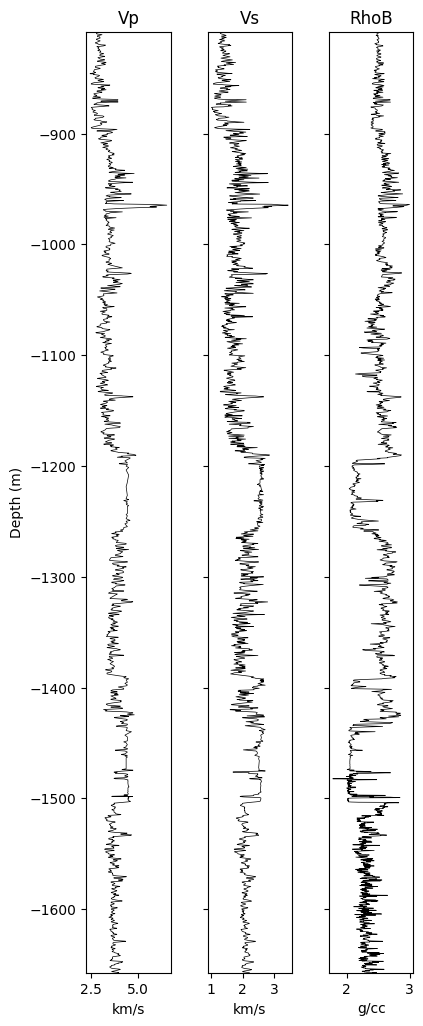

In [26]:
# Read in data conditioned well data and plot
import pandas as pd
import matplotlib.pyplot as plt

well_data = pd.read_csv('supporting_data/42_25d-3-RhoB-Corrected.csv')

fig, ax = plt.subplots(1,3,figsize=(4,10),sharey=True)
fig.tight_layout()
ax[0].plot(well_data.VP,-well_data.DEPTH,linewidth=0.5,color='k')
ax[1].plot(well_data.VS,-well_data.DEPTH,linewidth=0.5,color='k')
ax[2].plot(well_data.RHOB,-well_data.DEPTH,linewidth=0.5,color='k')
ax[0].set_title("Vp")
ax[1].set_title("Vs")
ax[2].set_title("RhoB")
ax[0].set_ylabel("Depth (m)")
ax[0].set_xlabel("km/s")
ax[1].set_xlabel("km/s")
ax[2].set_xlabel("g/cc")
ax[0].set_ylim(-max(well_data.DEPTH),-min(well_data.DEPTH))


c:\Users\s1320771\Documents\Coding\Python\.conda\lib\site-packages\IPython\core\interactiveshell.py:3445: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if await self.run_code(code, result, async_=asy):


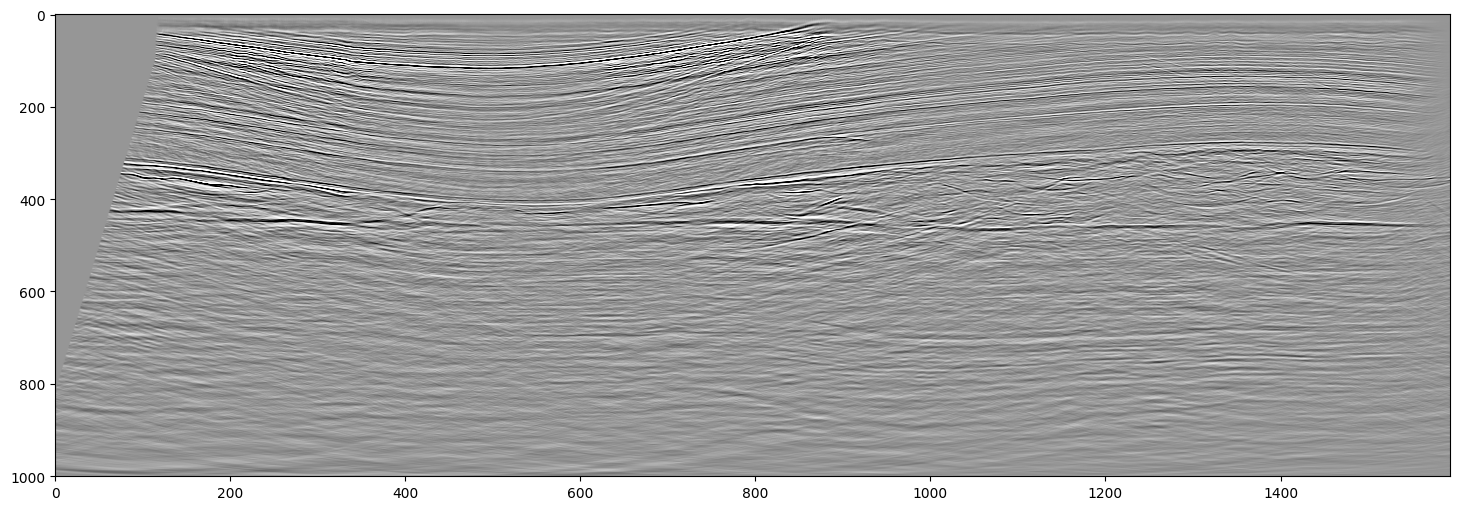

In [31]:
# Read in SEGY data and show seismic section
import numpy as np
from obspy.io.segy import segy

stream = segy._read_segy('supporting_data/Poststack_Final_Migration-Full_BP832D1002-83-1018-Final_Migration-Full-213109444_0.sgy',headonly=True)
data = np.stack(t.data for t in stream.traces)
vm = np.percentile(data, 99)
plt.figure(figsize=(18,6))
plt.imshow(data.T, cmap="Greys", vmin=-vm, vmax=vm, aspect='auto')
plt.show()